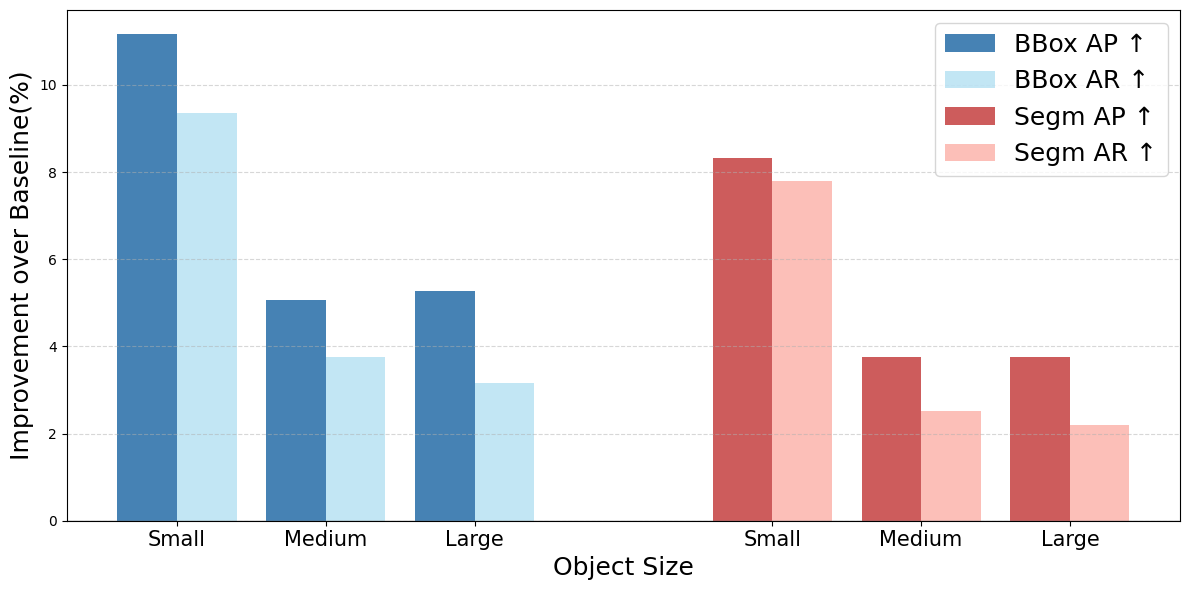

In [4]:
# vizualization
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import pickle


# 카테고리
sizes = ['Small', 'Medium', 'Large']
tasks = ['Detection', 'InstanceSegmentation']
width = 0.4

# 위치 설정
x = np.arange(len(sizes))
offset = len(sizes) + 1  # 그룹 간 간격

# 향상률 계산 함수
def compute_improvement(ours, baseline):
    return ((ours - baseline) / (baseline + 1e-8)) * 100

# 데이터 정의
baseline_bbox_ap = np.array([0.215, 0.414, 0.493])
baseline_bbox_ar = np.array([0.321, 0.559, 0.666])
baseline_segm_ap = np.array([0.156, 0.373, 0.506])
baseline_segm_ar = np.array([0.269, 0.515, 0.635])

ours_bbox_ap     = np.array([0.239, 0.435, 0.519])
ours_bbox_ar     = np.array([0.351, 0.580, 0.687])
ours_segm_ap     = np.array([0.169, 0.387, 0.525])
ours_segm_ar     = np.array([0.290, 0.528, 0.649])

# 향상률 계산
imp_bbox_ap = compute_improvement(ours_bbox_ap, baseline_bbox_ap)
imp_bbox_ar = compute_improvement(ours_bbox_ar, baseline_bbox_ar)
imp_segm_ap = compute_improvement(ours_segm_ap, baseline_segm_ap)
imp_segm_ar = compute_improvement(ours_segm_ar, baseline_segm_ar)

# 막대 위치
x_detect = x
x_segm = x + offset

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x_detect - width/2, imp_bbox_ap, width, label='BBox AP ↑', color='steelblue')
ax.bar(x_detect + width/2, imp_bbox_ar, width, label='BBox AR ↑', color='skyblue', alpha=0.5)
ax.bar(x_segm - width/2, imp_segm_ap, width, label='Segm AP ↑', color='indianred')
ax.bar(x_segm + width/2, imp_segm_ar, width, label='Segm AR ↑', color='salmon', alpha=0.5)

ax.set_ylabel('Improvement over Baseline(%)', fontsize=18)
ax.set_xlabel('Object Size', fontsize=18)

# 시각 설정
ax.axhline(0, color='gray', linewidth=1.0)

# X축 라벨 설정
# X축 라벨 설정
xticks = np.concatenate([x_detect, x_segm])
xtick_labels = [f'{size}' for size in sizes] + [f'{size}' for size in sizes]
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels, fontsize=15)

# 기타
ax.legend(loc='upper right', fontsize=18)
ax.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# save 
fig.savefig('object_size_improvement.png', dpi=1200, bbox_inches='tight')

In [5]:
# save log data to pickle
fpn_reg_loss = [
    0.3121,
    0.2797,
    0.2669,
    0.2583,
    0.2529,
    0.2488,
    0.2453,
    0.2424,
    0.2402,
    0.2384,
    0.2368,
    0.2353,
    0.2343,
    0.2330,
    0.2320,
    0.2311,
    0.2119,
    0.2069,
    0.2043,
    0.2021,
    0.2002,
    0.1983,
    0.1930,
    0.1924,
    0.1918,
    0.1914
]


fpn_cls_loss = [
    0.3532,
    0.2800,
    0.2626,
    0.2522,
    0.2457,
    0.2409,
    0.2365,
    0.2331,
    0.2303,
    0.2279,
    0.2257,
    0.2238,
    0.2225,
    0.2208,
    0.2194,
    0.2181,
    0.1784,
    0.1707,
    0.1669,
    0.1638,
    0.1613,
    0.1586,
    0.1514,
    0.1504,
    0.1498,
    0.1493,
]

fpn_reg_loss = np.array(fpn_reg_loss)
fpn_cls_loss = np.array(fpn_cls_loss)
# save to pickle
with open("fpn_reg_loss.pkl", "wb") as f:
    pickle.dump(fpn_reg_loss, f)
with open("fpn_cls_loss.pkl", "wb") as f:
    pickle.dump(fpn_cls_loss, f)

In [6]:
# save log data to pickle
ours_reg_loss = [
    0.3087,
    0.2770,
    0.2643,
    0.2569,
    0.2512,
    0.2475,
    0.2440,
    0.2414,
    0.2393,
    0.2378,
    0.2360,
    0.2348,
    0.2339,
    0.2324,
    0.2314,
    0.2305,
    0.2116,
    0.2068,
    0.2042,
    0.2021,
    0.2002,
    0.1985,
    0.1934,
    0.1926,
    0.1921,
    0.1919,
]

ours_cls_loss = [
    0.3470,
    0.2732,
    0.2551,
    0.2451,
    0.2374,
    0.2322,
    0.2280,
    0.2245,
    0.2215,
    0.2195,
    0.2169,
    0.2154,
    0.2138,
    0.2117,
    0.2109,
    0.2097,
    0.1718,   
    0.1645,
    0.1608,
    0.1580,
    0.1553,
    0.1533,
    0.1465,
    0.1455,
    0.1450,
    0.1447,
]

ours_reg_loss = np.array(ours_reg_loss)
ours_cls_loss = np.array(ours_cls_loss)
# save to pickle
with open("ours_reg_loss.pkl", "wb") as f:
    pickle.dump(ours_reg_loss, f)
with open("ours_cls_loss.pkl", "wb") as f:
    pickle.dump(ours_cls_loss, f)